In [1]:
addpath(genpath('../../matlab/HDI/'))
addpath(genpath('../../matlab/HDI/utils/'))
addpath(genpath('../../matlab/utils/chebfun/'))
addpath(genpath('../../matlab/utils/tt-toolbox/'))


In [2]:
%% parameters
Ds = [2];
Ns = [10,20,30];  %[10,20]
method = 'GL'; %method
norder = 2; % order
tol = 1e-16;
R = cell(5,numel(Ds), numel(Ns)); % cell array - dimensions x functions x orders

for itest = [2] % [2,4,5] choose the test problem
  for i = 1:numel(Ds) %loop through number of dimensions
    d = Ds(i);
    for j = 1:numel(Ns) %loop through number of intervals
      ncell = Ns(j);
      fprintf('\n\n %s - Ds = %d, itest = %d, ncell = %d\n',...
        method, d, itest, ncell);
      r = tt_GL_fn(itest, d, ncell, method, norder, tol);
      R{itest,i,j} = r;
    end
  end
end
%%
if 0
  fprintf('Saving result ...')
  filename = sprintf('hconv_test_result_Genz245_%s.m',method);
  save(filename,'Ds','Ns','method','tol','R');
  fprintf('Done \n');
end
%% check the convergence for accuracy
if 0
  itest = 2
  err = squeeze(cellfun(@(c) c.Err, R(itest,1,:)));
  figure()
  plot(log(Ns),log(err));
  temp = polyfit(log(Ns),log(err),1);
  sgtitle(sprintf('convergence rate = %.5f \n',log(err(2)/err(1))/log(1/2)));
end



 GL - Ds = 2, itest = 2, ncell = 10
======================= genz function 2 (product peak-Lorentzian) ===================
=amen_cross= swp=1, max_dx=1.215e+01, max_rank=4, #ifun_evals=321, #ffun_evals=0
=amen_cross= swp=2, max_dx=4.088e-15, max_rank=5, #ifun_evals=821, #ffun_evals=0
=amen_cross= swp=3, max_dx=6.644e-15, max_rank=5, #ifun_evals=1021, #ffun_evals=0
Err = 2.80682e-10, time = 1.74785e-02 


 GL - Ds = 2, itest = 2, ncell = 20
======================= genz function 2 (product peak-Lorentzian) ===================
=amen_cross= swp=1, max_dx=2.035e+01, max_rank=4, #ifun_evals=641, #ffun_evals=0
=amen_cross= swp=2, max_dx=4.802e-15, max_rank=6, #ifun_evals=1681, #ffun_evals=0
=amen_cross= swp=3, max_dx=7.110e-15, max_rank=6, #ifun_evals=2161, #ffun_evals=0
Err = 4.38627e-12, time = 5.29346e-03 


 GL - Ds = 2, itest = 2, ncell = 30
======================= genz function 2 (product peak-Lorentzian) ===================
=amen_cross= swp=1, max_dx=2.209e+01, max_rank=4, #ifun_evals

In [3]:
matlab_errs = squeeze(cellfun(@(c) c.Err, R(2,1,:)));
fortran_errs = [2.8068103397060895E-010,4.3864911702939935E-012,3.8236080968090391E-013];

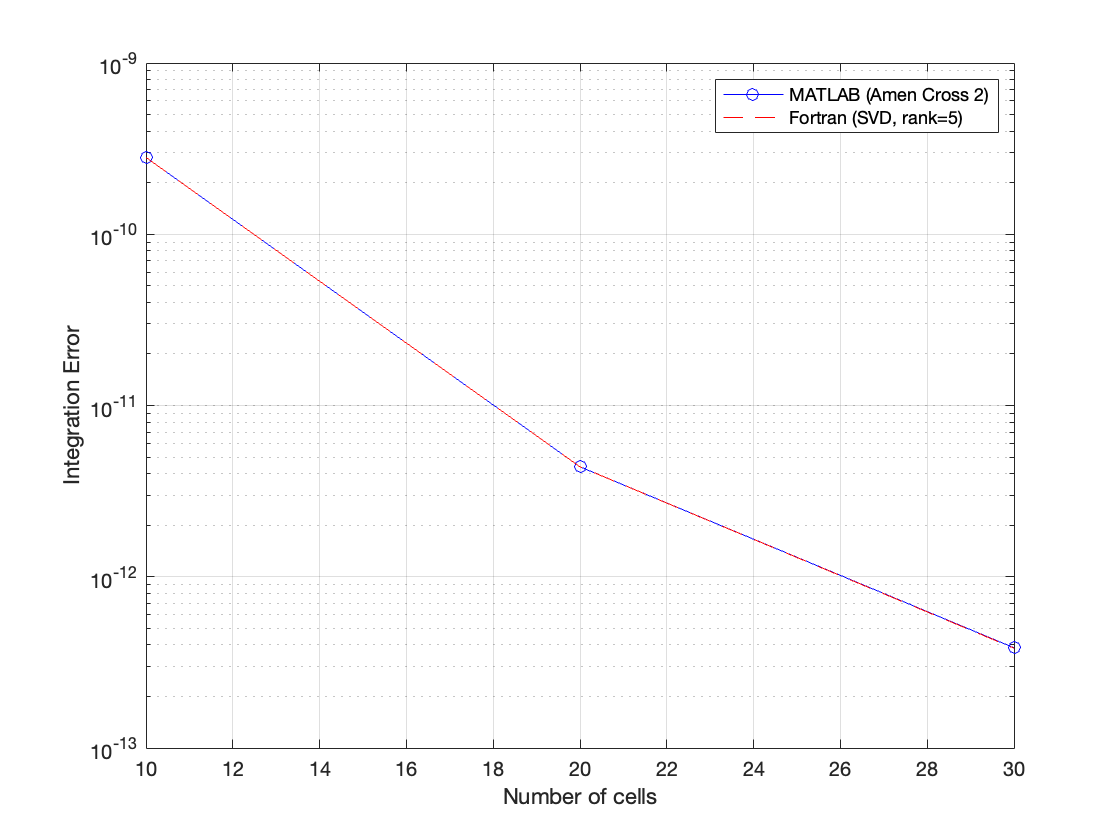

In [4]:
plot(Ns,matlab_errs,'b-o');
hold on;
plot(Ns,fortran_errs','r--');
legend('MATLAB (Amen Cross 2)', 'Fortran (SVD, rank=5)');
grid on;
xlabel('Number of cells');   
ylabel('Integration Error');   
set(gca, 'YScale', 'log');